In [11]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn
from pylab import rcParams

In [2]:
# Import FINAL_DF.csv
combined_path = "FINAL_DATAFRAME/FINAL_DF.csv"
combined_df= pd.read_csv(combined_path)
combined_df.head()

,Date,AAL,BAC,DAL,S&P500,WFC,JNJ,KO,MCD,PFE,...,WMT,TMUS,COST,NFLX,DIS,CVX,XOM,CL,PG,PEP
0,2010-01-01,5.005957,13.460909,10.863926,1073.869995,21.231312,45.894260,18.183428,45.350845,12.654274,...,41.107609,9.155951,44.383762,8.892858,25.738926,48.390926,45.100105,28.585510,44.368778,43.419220
1,2010-02-01,6.910295,14.773309,11.476853,1104.489990,20.417307,45.996483,17.670601,46.382374,11.901525,...,41.599998,10.034142,47.119598,9.435715,27.210964,48.511700,45.499088,29.957729,45.943375,45.494766
2,2010-03-01,6.929150,15.828542,12.960317,1169.430054,23.280611,47.966923,18.434809,48.879177,11.740099,...,42.777157,11.514055,46.287605,10.534286,30.407646,51.367226,47.190937,30.795710,45.936111,48.182087
3,2010-04-01,6.665183,15.820416,10.730680,1186.689941,24.769310,47.304802,18.210958,51.714325,11.445740,...,41.501411,12.408509,45.799232,14.128572,32.088741,55.167446,47.747517,30.376711,45.130230,47.834911
4,2010-05-01,8.324407,13.965980,12.063131,1089.410034,21.462746,42.890663,17.512501,48.989056,10.425756,...,39.118404,14.620247,45.155804,15.878572,29.109810,50.039509,42.597256,28.563391,44.694584,46.125996


In [4]:
#Calculate the monthly returns and save to a series, this is the percentage change of current price and previous price

sp500_returns = round(combined_df["S&P500"].pct_change(),2)
aal_returns = round(combined_df["AAL"].pct_change(),2)
bac_returns = round(combined_df["BAC"].pct_change(),2)
cost_returns = round(combined_df["COST"].pct_change(),2)
cvx_returns = round(combined_df["CVX"].pct_change(),2)

cl_returns = round(combined_df["CL"].pct_change(),2)
dal_returns = round(combined_df["DAL"].pct_change(),2)
dis_returns = round(combined_df["DIS"].pct_change(),2)
jnj_returns = round(combined_df["JNJ"].pct_change(),2)
ko_returns = round(combined_df["KO"].pct_change(),2)

mcd_returns = round(combined_df["MCD"].pct_change(),2)
nflx_returns = round(combined_df["NFLX"].pct_change(),2)
pep_returns = round(combined_df["PEP"].pct_change(),2)
pfe_returns = round(combined_df["PFE"].pct_change(),2)
pg_returns = round(combined_df["PG"].pct_change(),2)

sbux_returns = round(combined_df["SBUX"].pct_change(),2)
t_returns = round(combined_df["T"].pct_change(),2)
wfc_returns = round(combined_df["WFC"].pct_change(),2)
wmt_returns = round(combined_df["WMT"].pct_change(),2)
xom_returns = round(combined_df["XOM"].pct_change(),2)

In [5]:
#check to confirm returns confirm accuracy ln(P1/P0)...index 0 should be null
cvx_returns

0       NaN
1      0.00
2      0.06
3      0.07
4     -0.09
       ... 
115   -0.04
116    0.02
117   -0.02
118    0.01
119    0.04
Name: CVX, Length: 120, dtype: float64

In [6]:
# Define date column for inclusion in returns df
dates = combined_df["Date"]

In [7]:
# Pass the returns into a df
returns_df = pd.DataFrame({"Date":dates, "AAL": aal_returns, "BAC": bac_returns, "COST": cost_returns, "CVX":cvx_returns,
                           "CL":cl_returns, "DAL": dal_returns, "DIS": dis_returns, "JNJ": jnj_returns, "KO": ko_returns,
                           "MCD": mcd_returns, "NFLX": nflx_returns, "PEP": pep_returns, "PFE": pfe_returns, "PG": pg_returns,
                           "SBUX": sbux_returns, "T": t_returns, "WFC": wfc_returns, "WMT": wmt_returns, "XOM":xom_returns,
                           "SP500":sp500_returns})

In [8]:
returns_df.head()

,Date,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,NFLX,PEP,PFE,PG,SBUX,T,WFC,WMT,XOM,SP500
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-01,0.38,0.10,0.06,0.00,0.05,0.06,0.06,0.00,-0.03,...,0.06,0.05,-0.06,0.04,0.05,-0.01,-0.04,0.01,0.01,0.03
2,2010-03-01,0.00,0.07,-0.02,0.06,0.03,0.13,0.12,0.04,0.04,...,0.12,0.06,-0.01,-0.00,0.06,0.04,0.14,0.03,0.04,0.06
3,2010-04-01,-0.04,-0.00,-0.01,0.07,-0.01,-0.17,0.06,-0.01,-0.01,...,0.34,-0.01,-0.03,-0.02,0.07,0.01,0.06,-0.03,0.01,0.01
4,2010-05-01,0.25,-0.12,-0.01,-0.09,-0.06,0.12,-0.09,-0.09,-0.04,...,0.12,-0.04,-0.09,-0.01,0.00,-0.05,-0.13,-0.06,-0.11,-0.08


In [9]:
# Remove rows with null values, should be only the first row
returns_df = returns_df.dropna()
returns_df.head()

,Date,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,NFLX,PEP,PFE,PG,SBUX,T,WFC,WMT,XOM,SP500
1,2010-02-01,0.38,0.10,0.06,0.00,0.05,0.06,0.06,0.00,-0.03,...,0.06,0.05,-0.06,0.04,0.05,-0.01,-0.04,0.01,0.01,0.03
2,2010-03-01,0.00,0.07,-0.02,0.06,0.03,0.13,0.12,0.04,0.04,...,0.12,0.06,-0.01,-0.00,0.06,0.04,0.14,0.03,0.04,0.06
3,2010-04-01,-0.04,-0.00,-0.01,0.07,-0.01,-0.17,0.06,-0.01,-0.01,...,0.34,-0.01,-0.03,-0.02,0.07,0.01,0.06,-0.03,0.01,0.01
4,2010-05-01,0.25,-0.12,-0.01,-0.09,-0.06,0.12,-0.09,-0.09,-0.04,...,0.12,-0.04,-0.09,-0.01,0.00,-0.05,-0.13,-0.06,-0.11,-0.08
5,2010-06-01,-0.02,-0.09,-0.06,-0.07,0.01,-0.13,-0.06,0.02,-0.02,...,-0.02,-0.03,-0.05,-0.02,-0.06,-0.00,-0.11,-0.04,-0.05,-0.05


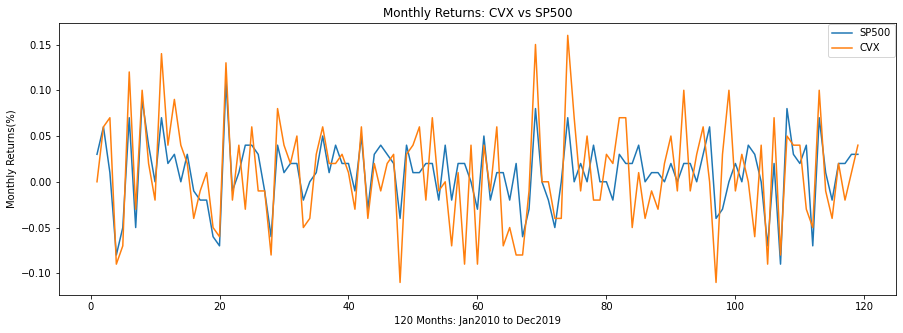

In [23]:
# Plot returns for a single stock and sp500
# Saved the .plot() as a new variable so I could call a legend to it in the following line. (clay)
rcParams['figure.figsize'] = 15, 5
returns_plot = returns_df[["SP500","CVX"]].plot()
returns_plot.legend(loc='best', borderaxespad=0.1)
plt.title('Monthly Returns: CVX vs SP500')
plt.xlabel("120 Months: Jan2010 to Dec2019")
plt.ylabel("Monthly Returns(%)")
plt.show()
#plt.savefig("Images/SingleStockMonthReturns.png")

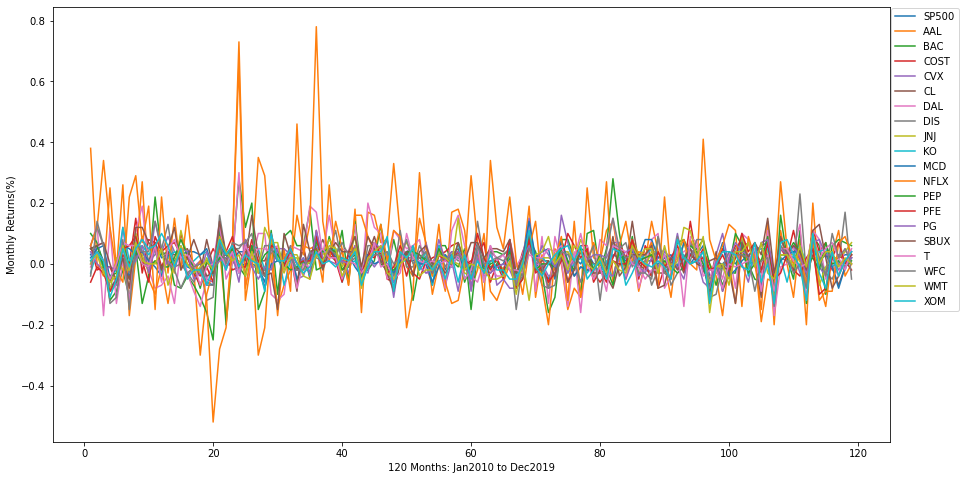

In [33]:
#Plot line plot of all returns to show monthly volatility and how they all swing on average between +-10% monthly 
rcParams['figure.figsize'] = 15, 8
all_returns_plot = returns_df[["SP500","AAL","BAC","COST","CVX","CL","DAL","DIS","JNJ","KO","MCD",
                               "NFLX","PEP","PFE","PG","SBUX","T","WFC","WMT","XOM"]].plot()

all_returns_plot.legend(bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0.1)
plt.xlabel("120 Months: Jan2010 to Dec2019")
plt.ylabel("Monthly Returns(%)")
plt.show()
#plt.savefig("Images/MonthReturns.png")

In [36]:
#Calculate the cummulative returns of the stocks over the 10 years period
sp500cumret =(sp500_returns + 1 ).cumprod()
aalcumret = (aal_returns + 1).cumprod()
baccumret = (bac_returns + 1).cumprod()
costcumret = (cost_returns + 1 ).cumprod()
cvxcumret = (cvx_returns + 1 ).cumprod()

clcumret = (cl_returns + 1).cumprod()
dalcumret = (dal_returns + 1).cumprod()
discumret = (dis_returns + 1 ).cumprod()
jnjcumret = (jnj_returns + 1 ).cumprod()
kocumret = (ko_returns + 1 ).cumprod()

mcdcumret = (mcd_returns + 1).cumprod()
nflxcumret = (nflx_returns + 1).cumprod()
pepcumret = (pep_returns + 1 ).cumprod()
pfecumret = (pfe_returns + 1 ).cumprod()
pgcumret = (pg_returns + 1 ).cumprod()

sbuxcumret = (sbux_returns + 1).cumprod()
tcumret = (t_returns + 1).cumprod()
wfccumret = (wfc_returns + 1 ).cumprod()
wmtcumret = (wmt_returns + 1 ).cumprod()
xomcumret = (xom_returns + 1 ).cumprod()

In [37]:
round(sp500cumret,2)

0       NaN
1      1.03
2      1.09
3      1.10
4      1.01
       ... 
115    2.66
116    2.72
117    2.77
118    2.85
119    2.94
Name: S&P500, Length: 120, dtype: float64

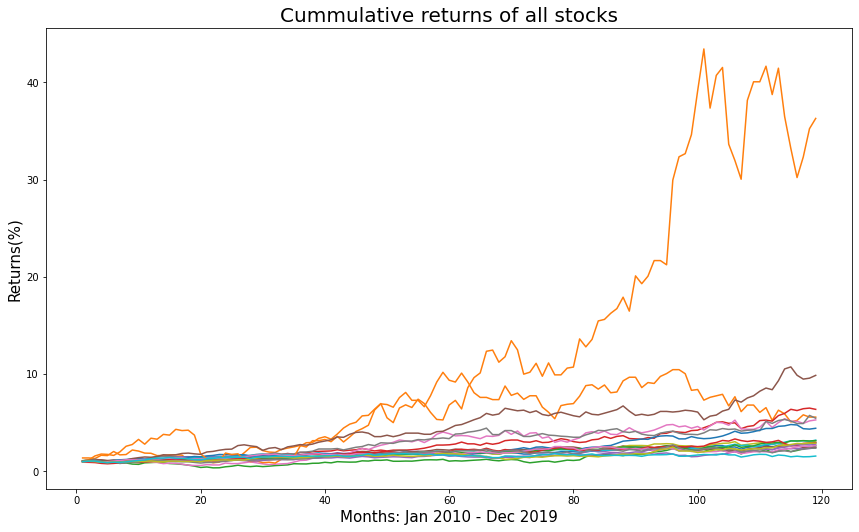

In [128]:
#line plot of the cummulative returns of the stocks 
rcParams['figure.figsize'] = 14, 8
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

# cumret_plot = (sp500cumret,aalcumret,baccumret,costcumret,cvxcumret,clcumret,dalcumret,discumret,
#                        jnjcumret,kocumret,mcdcumret,nflxcumret,pepcumret,pfecumret,pgcumret,sbuxcumret,
#                        tcumret,wfccumret,wmtcumret,xomcumret)

ax1.plot(sp500cumret)
ax1.plot(aalcumret)
ax1.plot(baccumret)
ax1.plot(costcumret)
ax1.plot(cvxcumret)

ax1.plot(clcumret)
ax1.plot(dalcumret)
ax1.plot(discumret)
ax1.plot(jnjcumret)
ax1.plot(kocumret)

ax1.plot(mcdcumret)
ax1.plot(nflxcumret)
ax1.plot(pepcumret)
ax1.plot(pfecumret)
ax1.plot(pgcumret)

ax1.plot(sbuxcumret)
ax1.plot(tcumret)
ax1.plot(wfccumret)
ax1.plot(wmtcumret)
ax1.plot(xomcumret)

plt.xlabel("Months: Jan 2010 - Dec 2019", size=15)
plt.ylabel("Returns(%)", size=15)
plt.title("Cummulative returns of all stocks", size=20)
plt.show()
#plt.savefig("Images/Cummulative.png")

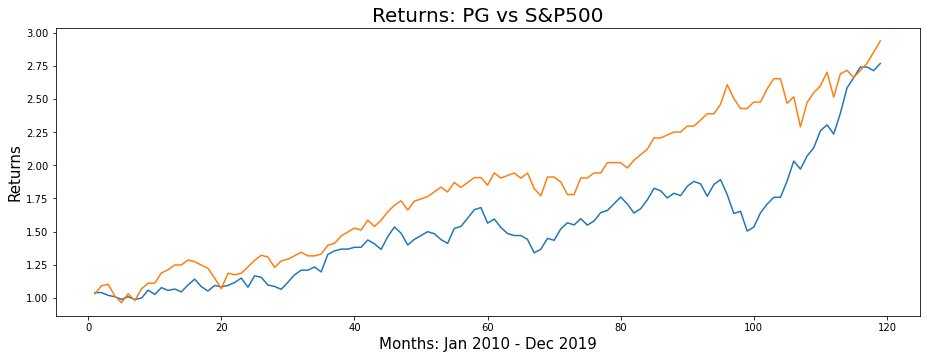

In [127]:
# Sample line of returns between PG vs S&P500
rcParams['figure.figsize'] = 15, 5
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(pgcumret)
ax1.plot(sp500cumret)
plt.xlabel("Months: Jan 2010 - Dec 2019", size=15)
plt.ylabel("Returns", size=15)
plt.title('Returns: PG vs S&P500', size=20)
plt.show()

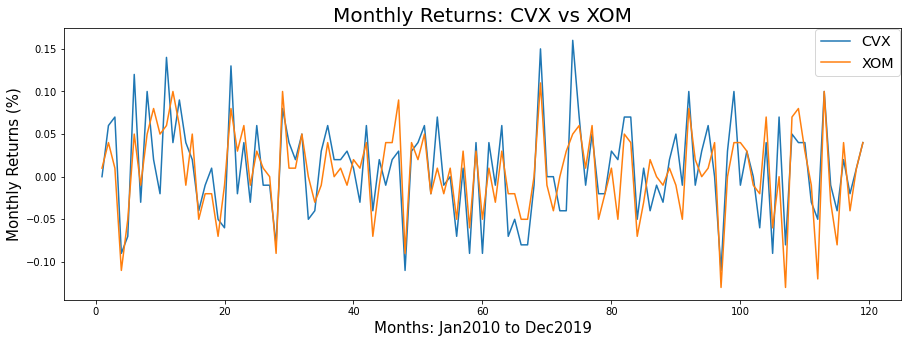

In [125]:
# Sample line with CVX and XOM
rcParams['figure.figsize'] = 15, 5
returns_plot2 = returns_df[["CVX","XOM"]].plot()
returns_plot2.legend(loc='best', borderaxespad=0.1, fontsize='x-large')
plt.xlabel("Months: Jan2010 to Dec2019", size=15)
plt.ylabel("Monthly Returns (%)", size=15)
plt.title("Monthly Returns: CVX vs XOM", size=20)
plt.show()

In [20]:
#BarChart = returns_df[["CVX","XOM","CL","PG","PEP"]]

In [21]:
#Bar = BarChart.plot(kind="bar",figsize=(10,5), title="Retunrs 5 stocks",
#                                        color="green", fontsize=12 )

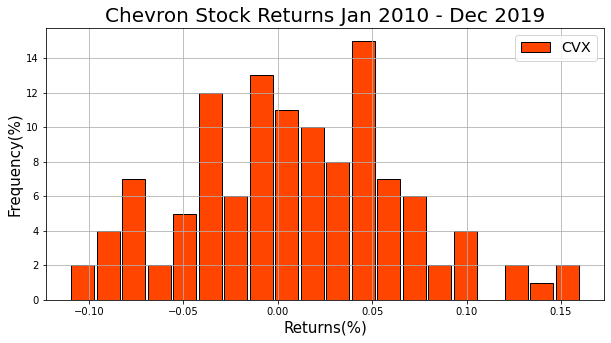

In [215]:
# Show the fluctuation in returns for one asset

rcParams['figure.figsize'] = 10, 5
returns_df["CVX"].plot.hist(grid=True, bins=20, rwidth=0.9, color='orangered', edgecolor='black')
plt.title("Chevron Stock Returns Jan 2010 - Dec 2019", size=20)
plt.legend(loc='upper right', fontsize='x-large')
plt.ylabel("Frequency(%)", size=15)
plt.xlabel("Returns(%)", size=15)
plt.show()
#plt.savefig("Images/CVXReturns.png")

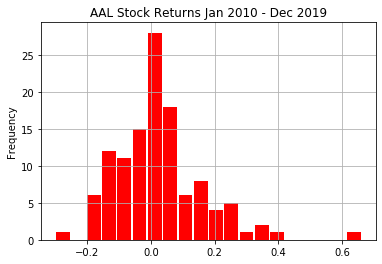

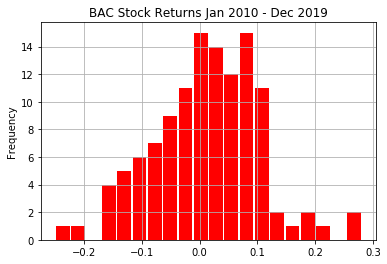

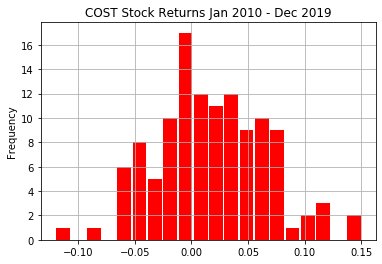

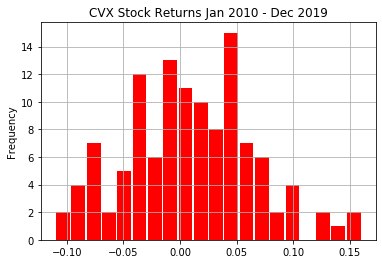

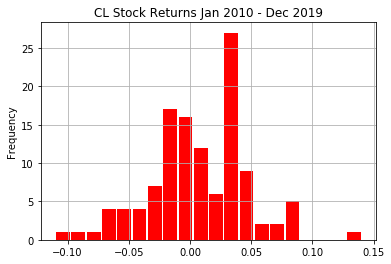

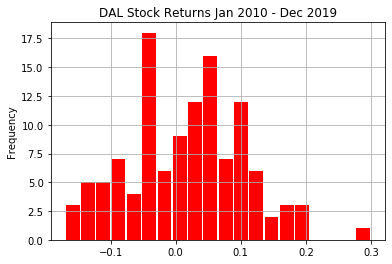

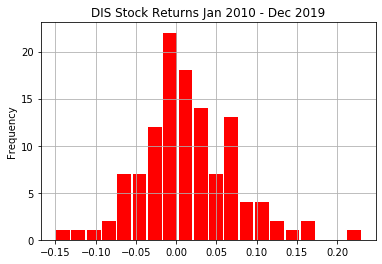

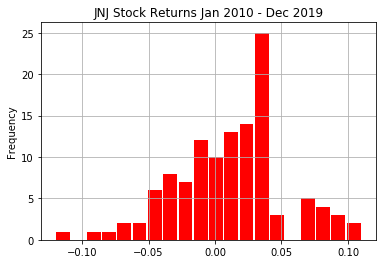

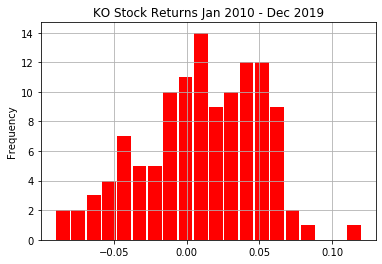

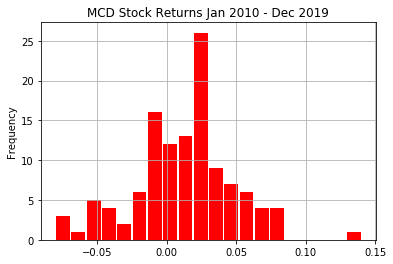

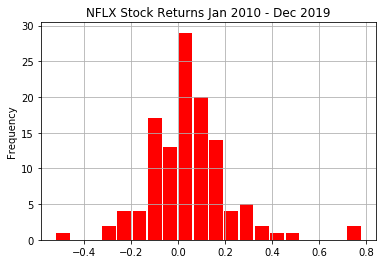

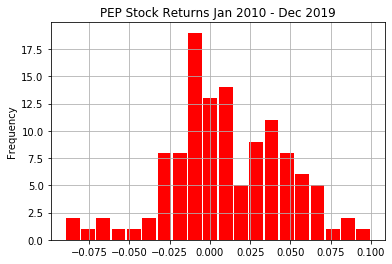

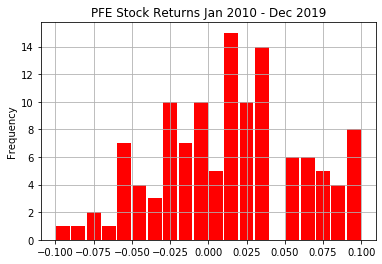

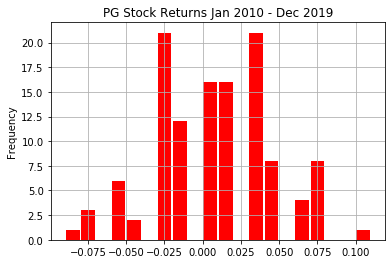

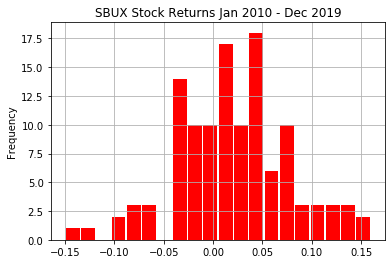

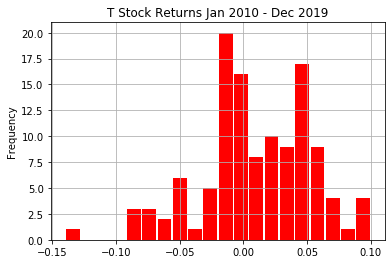

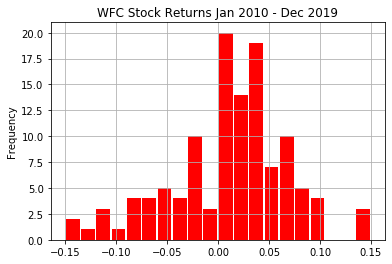

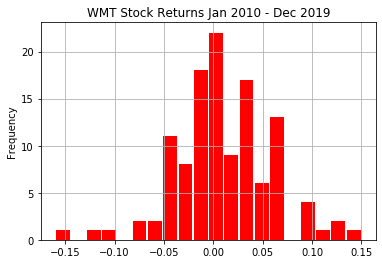

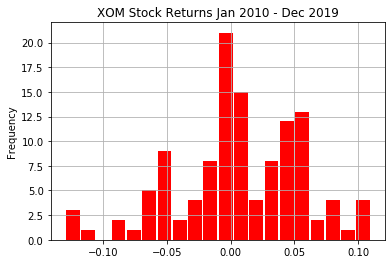

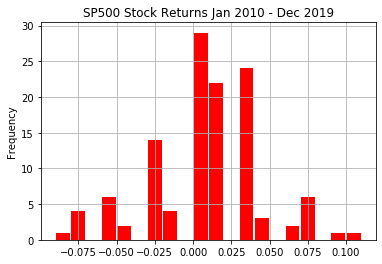

In [180]:
# Make plots for multiple data sets using iterrow method
#Show the fluctuation in returns for one asset
#returns_df["XOM"].plot.hist(grid=True, bins=20, rwidth=0.9, color="green")
combined_list = []
ticker_list = combined_df.index.to_list()
#print(ticker_list)
# for i in combined_df:
#     print(combined_df[i])
#     ticker_list.append(combined_df[i])
columns_names_list = []
combined_dict = {}

for i in combined_df.columns: 
    #print(i) 
    columns_names_list.append(i)
    #combined_dict.add
    #combined_dict.add(1, i)
    
#print(columns_names_list)
# for i in combined_df:
#     #print(combined_df[i])
#     returns_df["CVX"].plot.hist(grid=True, bins=20, rwidth=0.9, color="red")
#     plt.title("Chevron Stock Returns Jan 2010 - Dec 2019")
#     plt.ylabel("Frequency(%)")
#     plt.xlabel("Returns(%)")

# for i in range(len(columns_names_list)):
#     #print(i)
# #     print(combined_df[columns_names_list[i]])
#     #returns_df['CVX'].plot.hist(grid=True, bins=20, rwidth=0.9, color="red")
#     ticker = columns_names_list[i]
#     print(ticker)
#     returns_df["PFE"].plot.hist(grid=True, bins=20, rwidth=0.9, color="red")
date_indexed_df = returns_df.set_index('Date')
date_indexed_df

for column in date_indexed_df:
    columnSeriesObj = date_indexed_df[column]
    #print('Column Name: ', column)
    #print(f"Series column object: {columnSeriesObj}.")
    columnSeriesObj.plot.hist(grid=True, bins=20, rwidth=0.9, color="red")
    plt.title(f"{column} Stock Returns Jan 2010 - Dec 2019")
    plt.show()

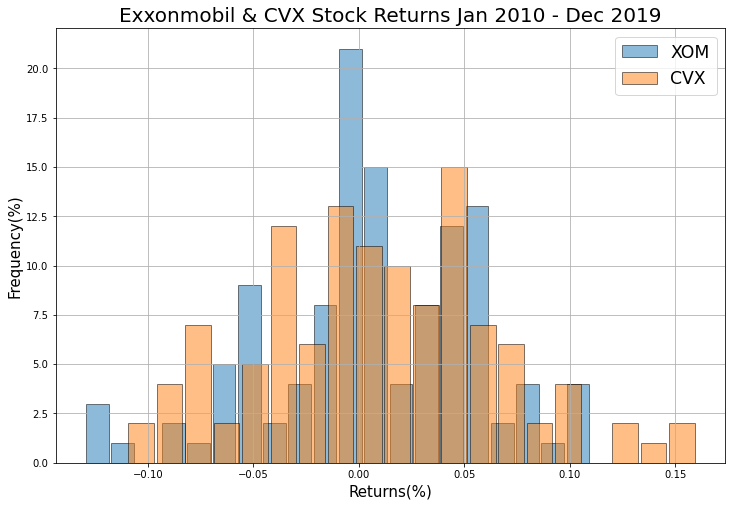

In [210]:
rcParams['figure.figsize'] = 12, 8
returns_df["XOM"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["CVX"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("Exxonmobil & CVX Stock Returns Jan 2010 - Dec 2019", size=20)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency(%)", size=15)
plt.show()
#plt.savefig("Images/XOMReturns.png")

In [143]:
# Standard deviations of returns
sp500std = round(returns_df["SP500"].std(),3)
aalstd   = round(returns_df["AAL"].std(),3)
bacstd   = round(returns_df["BAC"].std(),3)
coststd  = round(returns_df["COST"].std(),3)
cvxstd   = round(returns_df["CVX"].std(),3)

clstd    = round(returns_df["CL"].std(),3)
dalstd   = round(returns_df["DAL"].std(),3)
disstd   = round(returns_df["DIS"].std(),3)
jnjstd   = round(returns_df["JNJ"].std(),3)
kostd    = round(returns_df["KO"].std(),3)

mcdstd   = round(returns_df["MCD"].std(),3)
nflxstd  = round(returns_df["NFLX"].std(),3)
pepstd   = round(returns_df["PEP"].std(),3)
pfestd   = round(returns_df["PFE"].std(),3)
pgstd    = round(returns_df["PG"].std(),3)

sbuxstd  = round(returns_df["SBUX"].std(),3)
tstd     = round(returns_df["T"].std(),3)
wfcstd   = round(returns_df["WFC"].std(),3)
wmtstd   = round(returns_df["WMT"].std(),3)
xomstd   = round(returns_df["XOM"].std(),3)

In [144]:
# Standard deviation of prices 
sp500stdP = round(combined_df["S&P500"].std(),3)
aalstdP   = round(combined_df["AAL"].std(),3)
bacstdP   = round(combined_df["BAC"].std(),3)
coststdP  = round(combined_df["COST"].std(),3)
cvxstdP   = round(combined_df["CVX"].std(),3)

clstdP    = round(combined_df["CL"].std(),3)
dalstdP   = round(combined_df["DAL"].std(),3)
disstdP   = round(combined_df["DIS"].std(),3)
jnjstdP   = round(combined_df["JNJ"].std(),3)
kostdP    = round(combined_df["KO"].std(),3)

mcdstdP   = round(combined_df["MCD"].std(),3)
nflxstdP  = round(combined_df["NFLX"].std(),3)
pepstdP   = round(combined_df["PEP"].std(),3)
pfestdP   = round(combined_df["PFE"].std(),3)
pgstdP    = round(combined_df["PG"].std(),3)

sbuxstdP  = round(combined_df["SBUX"].std(),3)
tstdP     = round(combined_df["T"].std(),3)
wfcstdP   = round(combined_df["WFC"].std(),3)
wmtstdP   = round(combined_df["WMT"].std(),3)
xomstdP   = round(combined_df["XOM"].std(),3)

In [153]:
# std of returns into dataframe
stddevR = pd.DataFrame({"SP500": sp500std, "AAL": aalstd, "BAC": bacstd, "COST": coststd, "CVX": cvxstd,
             "CL": clstd, "DAL": dalstd, "DIS": disstd, "JNJ": jnjstd, "KO": kostd,
             "MCD": mcdstd, "NFLX": nflxstd, "PEP": pepstd, "PFE": pfestd, "PG": pgstd,
             "SBUX": sbuxstd, "T": tstd, "WFC": wfcstd, "WMT": wmtstd, "XOM": xomstd}, index=[0])
stddevR

,SP500,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,MCD,NFLX,PEP,PFE,PG,SBUX,T,WFC,WMT,XOM
0,0.036,0.137,0.093,0.048,0.056,0.041,0.09,0.059,0.041,0.039,0.037,0.173,0.038,0.047,0.039,0.057,0.044,0.058,0.049,0.049


In [154]:
# Pass on std of returns into series for bar chart
data_stdR = {"SP500": sp500std, "AAL": aalstd, "BAC": bacstd, "COST": coststd, "CVX": cvxstd,
             "CL": clstd, "DAL": dalstd, "DIS": disstd, "JNJ": jnjstd, "KO": kostd,
             "MCD": mcdstd, "NFLX": nflxstd, "PEP": pepstd, "PFE": pfestd, "PG": pgstd,
             "SBUX": sbuxstd, "T": tstd, "WFC": wfcstd, "WMT": wmtstd, "XOM": xomstd}
Ret_Std = pd.Series(data_stdR)
Ret_Std

SP500    0.036
AAL      0.137
BAC      0.093
COST     0.048
CVX      0.056
CL       0.041
DAL      0.090
DIS      0.059
JNJ      0.041
KO       0.039
MCD      0.037
NFLX     0.173
PEP      0.038
PFE      0.047
PG       0.039
SBUX     0.057
T        0.044
WFC      0.058
WMT      0.049
XOM      0.049
dtype: float64

In [157]:
# *******NOTE FROM CLAY-> WE DON'T NEED LEGEND FOR THIS CHART BECAUSE TITLES ARE LISTED AT BOTTOM OF BARS.**********

# colors = {'SP500': 'lightcoral', 'AAL': 'goldenrod', 'BAC': 'olivedrab', 'COST': 'darkturquoise', 'CVX':'violet', 
#           'CL': 'chocolate', 'DAL': 'darkseagreen', 'DIS': 'fuchsia', 'JNJ': 'darkorchid', 'KO': 'slateblue', 
#           'MCD': 'tomato', 'NFLX': 'green', 'PEP': 'royalblue', 'PFE': 'crimson', 'PG': 'lightcyan', 
#           'SBUX': 'gray', 'T': 'brown', 'WFC': 'steelblue', 'WMT':'plum', 'XOM':'lightcoral'}
# labels = data_stdR
# # print(label)
# handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# plt.legend(handles, labels)
# plt.show()

In [179]:
# *******NOTE FROM CLAY-> WE DON'T NEED LEGEND FOR THIS CHART BECAUSE TITLES ARE LISTED AT BOTTOM OF BARS.**********

# RetStd_Bar = Ret_Std.plot(kind="bar",figsize=(8,5), title="Ten Years Returns Std of 20 stocks 2010-2019",
#                                        color="b", fontsize=12)#, label=labels , label=tuple(labels_stdR))# , label=data_stdR()) #label=data_stdR)#'_nolegend_')

# plt.legend(bbox_to_anchor=(1.05, 1))
#labels_stdR = list(data_stdR.keys())

# key_list = []
# for i in range(len(data_stdR)):
#     print(data_stdR[i].keys())

#legend()

# RetStd_Bar.set_label('Label via method')
# RetStd_Bar, = RetStd_Bar.plot([1, 2, 3])
# ax.legend()

#plt.savefig("Images/Retstd.png")

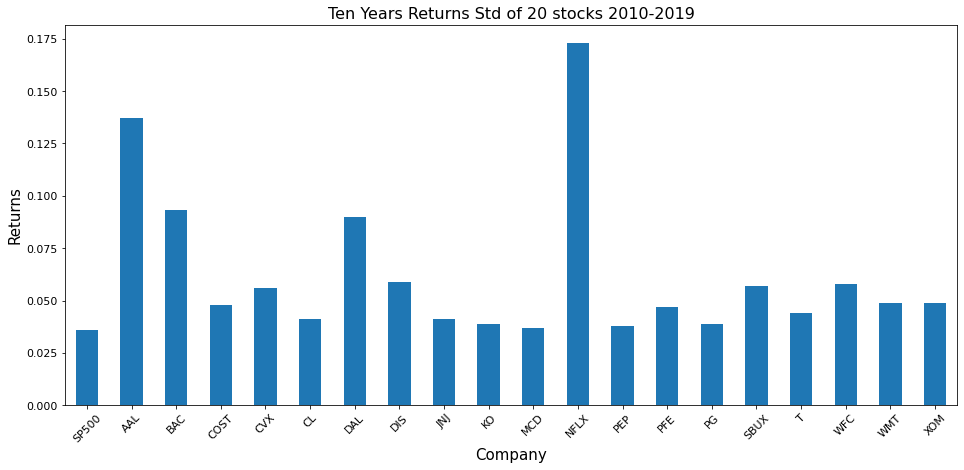

In [201]:
rcParams['figure.figsize'] = 16, 7
RetStd_Bar = Ret_Std.plot(kind="bar", rot = 45, fontsize=11)
RetStd_Bar.set_xlabel('Company', size=15)
RetStd_Bar.set_ylabel('Returns', size=15)
RetStd_Bar.set_title('Ten Years Returns Std of 20 stocks 2010-2019', size=16)
plt.show()

In [202]:
# Std of prices 
stddevP = pd.DataFrame({"SP500": sp500stdP, "AAL": aalstdP, "BAC": bacstdP, "COST": coststdP, "CSV": cvxstdP,
                        "CL": clstdP, "DAL": dalstdP, "DIS": disstdP, "JNJ": jnjstdP, "KO": kostdP,
                        "MCD": mcdstdP, "NFLX": nflxstdP, "PEP": pepstdP, "PFE": pfestdP, "PG": pgstdP,
                        "SBUX": sbuxstdP, "T": tstdP, "WFC": wfcstdP, "WMT": wmtstdP, "XOM": xomstdP}, index=[0])
stddevP

,SP500,AAL,BAC,COST,CSV,CL,DAL,DIS,JNJ,KO,MCD,NFLX,PEP,PFE,PG,SBUX,T,WFC,WMT,XOM
0,593.974,15.207,7.493,65.232,18.088,13.781,17.593,33.669,30.986,8.63,44.531,115.706,25.429,8.775,18.832,20.847,5.924,11.35,19.715,8.956


In [203]:
# Make a series for std of prices 
#data_stdP = {"CVX": cvxstdP,"XOM": xomstdP,"PG": pgstdP,"CL":clstdP,"PEP":pepstdP,"SP500":sp500stdP}
data_stdP = {"SP500": sp500stdP, "AAL": aalstdP, "BAC": bacstdP, "COST": coststdP, "CSV": cvxstdP,
             "CL": clstdP, "DAL": dalstdP, "DIS": disstdP, "JNJ": jnjstdP, "KO": kostdP,
             "MCD": mcdstdP, "NFLX": nflxstdP, "PEP": pepstdP, "PFE": pfestdP, "PG": pgstdP,
             "SBUX": sbuxstdP, "T": tstdP, "WFC": wfcstdP, "WMT": wmtstdP, "XOM": xomstdP}
Price_Std = pd.Series(data_stdP)
Price_Std

SP500    593.974
AAL       15.207
BAC        7.493
COST      65.232
CSV       18.088
CL        13.781
DAL       17.593
DIS       33.669
JNJ       30.986
KO         8.630
MCD       44.531
NFLX     115.706
PEP       25.429
PFE        8.775
PG        18.832
SBUX      20.847
T          5.924
WFC       11.350
WMT       19.715
XOM        8.956
dtype: float64

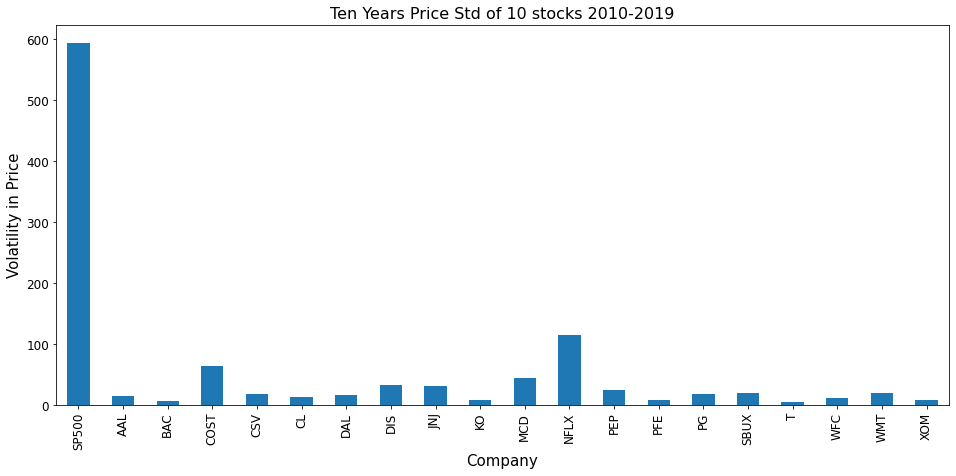

In [204]:
# Should we consider removing S&P500 from this chart?
rcParams['figure.figsize'] = 16, 7
PriceStd_Bar = Price_Std.plot(kind="bar", fontsize=12 )
PriceStd_Bar.set_title('Ten Years Price Std of 10 stocks 2010-2019', size=16)
PriceStd_Bar.set_xlabel('Company', size=15)
PriceStd_Bar.set_ylabel('Volatility in Price', size=15)
plt.show()
#plt.savefig("Images/Pricestd.png")

In [205]:
#Correlation Matrix ...a measure linear relationship between 2 variable..the effect of a change in one 
#variable on the other variable 
CorrelationMat = returns_df[["SP500", "AAL", "BAC", "COST", "CVX", 
                             "CL", "DAL", "DIS", "JNJ", "KO",
                             "MCD", "NFLX", "PEP", "PFE", "PG",
                             "SBUX","T","WFC","WMT","XOM"]].corr()
CorrelationMat

,SP500,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,MCD,NFLX,PEP,PFE,PG,SBUX,T,WFC,WMT,XOM
SP500,1.000000,0.296410,0.621256,0.495398,0.686653,0.480125,0.397322,0.646480,0.555185,0.438069,0.349859,0.249002,0.456676,0.516324,0.344167,0.414075,0.358957,0.696531,0.304007,0.677061
AAL,0.296410,1.000000,0.330107,0.118145,0.014423,0.124721,0.718378,0.185667,0.146625,0.005558,-0.049394,0.213282,0.193013,0.057515,-0.003280,0.185279,0.028393,0.207643,0.122373,0.080710
BAC,0.621256,0.330107,1.000000,0.204515,0.380809,0.110155,0.350174,0.420849,0.252673,0.018673,0.044708,0.298442,0.080872,0.295660,0.064170,0.246543,0.049786,0.679793,0.065423,0.301315
COST,0.495398,0.118145,0.204515,1.000000,0.312302,0.468540,0.232451,0.273430,0.411159,0.331285,0.269884,0.069392,0.485637,0.348335,0.391720,0.308405,0.284348,0.254135,0.346959,0.312577
CVX,0.686653,0.014423,0.380809,0.312302,1.000000,0.319163,0.075538,0.451050,0.411013,0.378215,0.412651,0.026386,0.302752,0.430874,0.264548,0.228988,0.404747,0.519527,0.119148,0.771913
CL,0.480125,0.124721,0.110155,0.468540,0.319163,1.000000,0.172512,0.257822,0.566608,0.493389,0.346700,-0.064712,0.669013,0.321492,0.554765,0.301221,0.454762,0.187570,0.321690,0.298218
DAL,0.397322,0.718378,0.350174,0.232451,0.075538,0.172512,1.000000,0.276136,0.277151,0.088087,0.128664,0.168718,0.227244,0.120407,0.163072,0.307741,0.006422,0.291651,0.196805,0.135159
DIS,0.646480,0.185667,0.420849,0.273430,0.451050,0.257822,0.276136,1.000000,0.278296,0.329992,0.274605,0.169160,0.341779,0.359159,0.208618,0.342984,0.227468,0.504576,0.202507,0.453179
JNJ,0.555185,0.146625,0.252673,0.411159,0.411013,0.566608,0.277151,0.278296,1.000000,0.464942,0.438431,0.029282,0.626278,0.537442,0.395705,0.163971,0.309076,0.312197,0.409543,0.498969
KO,0.438069,0.005558,0.018673,0.331285,0.378215,0.493389,0.088087,0.329992,0.464942,1.000000,0.519913,-0.037766,0.586890,0.315263,0.383700,0.256682,0.342697,0.277811,0.395674,0.327510


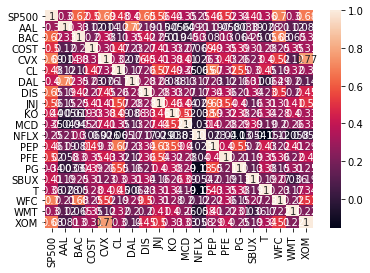

In [33]:
#Corelation matrix visual 
sn.heatmap(CorrelationMat, annot=True) #, cbar_kws={'orientation': 'horizontal'})        # , square=True
#plt.savefig("Images/CorrMatrix.png")
ax1 = sn.heatmap(CorrelationMat, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.show()

In [34]:
#Covariance Matrix
Covariance = returns_df[["SP500", "AAL", "BAC", "COST", "CVX",
                         "CL", "DAL", "DIS", "JNJ", "KO",
                         "MCD", "NFLX", "PEP", "PFE", "PG",
                         "SBUX","T","WFC","WMT","XOM"]].cov()
Covariance

,SP500,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,MCD,NFLX,PEP,PFE,PG,SBUX,T,WFC,WMT,XOM
SP500,0.001311,0.001473,0.002092,0.000858,0.001399,0.000712,0.001296,0.001376,0.000819,0.000614,0.000474,0.001559,0.000626,0.000871,0.000481,0.000851,0.000576,0.001455,0.000537,0.001212
AAL,0.001473,0.018833,0.004214,0.000775,0.000111,0.000701,0.008882,0.001498,0.000820,0.000030,-0.000253,0.005061,0.001002,0.000368,-0.000017,0.001443,0.000173,0.001644,0.000820,0.000548
BAC,0.002092,0.004214,0.008651,0.000910,0.001993,0.000420,0.002934,0.002301,0.000957,0.000067,0.000156,0.004799,0.000285,0.001282,0.000230,0.001302,0.000205,0.003647,0.000297,0.001386
COST,0.000858,0.000775,0.000910,0.002286,0.000840,0.000918,0.001001,0.000769,0.000801,0.000613,0.000483,0.000574,0.000878,0.000776,0.000723,0.000837,0.000603,0.000701,0.000810,0.000739
CVX,0.001399,0.000111,0.001993,0.000840,0.003166,0.000736,0.000383,0.001492,0.000942,0.000823,0.000868,0.000257,0.000644,0.001130,0.000575,0.000731,0.001009,0.001686,0.000327,0.002148
CL,0.000712,0.000701,0.000420,0.000918,0.000736,0.001679,0.000637,0.000621,0.000946,0.000782,0.000531,-0.000458,0.001037,0.000614,0.000878,0.000701,0.000826,0.000443,0.000643,0.000604
DAL,0.001296,0.008882,0.002934,0.001001,0.000383,0.000637,0.008117,0.001463,0.001017,0.000307,0.000434,0.002628,0.000775,0.000506,0.000567,0.001574,0.000026,0.001516,0.000866,0.000602
DIS,0.001376,0.001498,0.002301,0.000769,0.001492,0.000621,0.001463,0.003456,0.000666,0.000751,0.000604,0.001719,0.000760,0.000984,0.000474,0.001145,0.000593,0.001711,0.000581,0.001318
JNJ,0.000819,0.000820,0.000957,0.000801,0.000942,0.000946,0.001017,0.000666,0.001659,0.000733,0.000668,0.000206,0.000965,0.001020,0.000622,0.000379,0.000558,0.000734,0.000814,0.001005
KO,0.000614,0.000030,0.000067,0.000613,0.000823,0.000782,0.000307,0.000751,0.000733,0.001497,0.000752,-0.000253,0.000859,0.000568,0.000573,0.000564,0.000588,0.000620,0.000747,0.000627


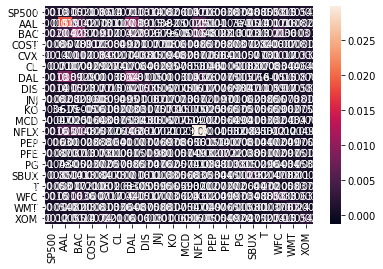

In [35]:
#Covariance matrix visual 
sn.heatmap(Covariance, annot=True)
plt.show()
#plt.savefig("Images/Covariance.png")

In [36]:
#Perform regression analysis to predict the stocks of 2 stocks with lowest correlation 

In [37]:
cvx_combined_df = combined_df[["Date", "CVX"]]
cvx_combined_df.head()

,Date,CVX
0,2010-01-01,48.390926
1,2010-02-01,48.511700
2,2010-03-01,51.367226
3,2010-04-01,55.167446
4,2010-05-01,50.039509


In [38]:
cvx_combined_df = (cvx_combined_df.drop(['Date'], axis=1)).reset_index()
cvx_combined_df.head()

,index,CVX
0,0,48.390926
1,1,48.511700
2,2,51.367226
3,3,55.167446
4,4,50.039509


In [39]:
len(cvx_combined_df)

120

In [40]:
#cvx_reg_df = combined_df['CVX']

#cvx_dropped_reg_df = cvx_reg_df.drop(cvx_reg_df["Date"]).reset_index()
#cvx_reg_df

In [41]:
# regression1_df = regression_df.rename(columns={"Index","Months"}, inplace=True)
len(cvx_combined_df)

120

The r-squared is: 0.7211201233688641


<function matplotlib.pyplot.show(*args, **kw)>

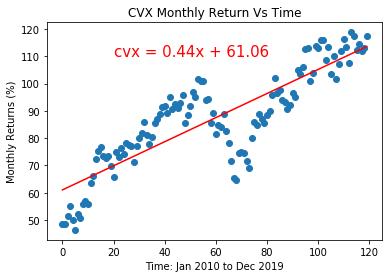

In [42]:
#CVX Regression 
#Define x and y variables for scatter plot
x_values = cvx_combined_df["index"]
y_values = cvx_combined_df["CVX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "cvx = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Returns (%)")
plt.title("CVX Monthly Return Vs Time")
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Images/CVX_ScatterPlot.png")
plt.show

In [43]:
CVX_Jan2020 = (0.44*121) + 61.06
CVX_Feb2020 = (0.44*122) + 61.06
print(f"The forcasted monthly closing price of CVX in Jan 2020 is {CVX_Jan2020}")
print(f"The forcasted monthly closing price of CVX in Feb 2020 is {CVX_Feb2020}")

The forcasted monthly closing price of CVX in Jan 2020 is 114.30000000000001
The forcasted monthly closing price of CVX in Feb 2020 is 114.74000000000001


In [44]:
#the actual closing price of CVX in Jan is 104.37
#the actual closing price of CVX in Feb is  90.93...the std of cvx price is +/-18.1

In [45]:
pg_reg_df = combined_df[["Date", "PG"]]
pg_reg_df.head()

pg_reg_df = pg_reg_df.drop(["Date"], axis=1).reset_index()

In [46]:
pg_reg_df.head()

,index,PG
0,0,44.368778
1,1,45.943375
2,2,45.936111
3,3,45.130230
4,4,44.694584


The r-squared is: 0.8344911100716595


<function matplotlib.pyplot.show(*args, **kw)>

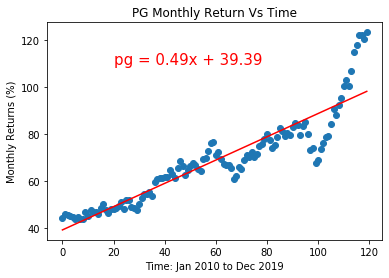

In [47]:
#PEP Regression 
#Define x and y variables for scatter plot
x_values = pg_reg_df["index"]
y_values = pg_reg_df["PG"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "pg = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Returns (%)")
plt.title("PG Monthly Return Vs Time")
print(f"The r-squared is: {rvalue**2}")
#plt.savefig("Images/PG_ScatterPlot.png")
plt.show

In [48]:
PG_Jan2020 = (0.49*121) + 39.39
PG_Feb2020 = (0.49*122) + 39.39
print(f"The forcasted monthly closing price of PG in Jan 2020 is {PG_Jan2020}")
print(f"The forcasted monthly closing price of PG in Feb 2020 is {PG_Feb2020}")

The forcasted monthly closing price of PG in Jan 2020 is 98.68
The forcasted monthly closing price of PG in Feb 2020 is 99.17


In [49]:
#the actual closing price of PG in Jan is 123.06
#the actual closing price of PG in Feb is  112.48...
#forecasted price for Jan is outside of std 18.83, while Feb is within

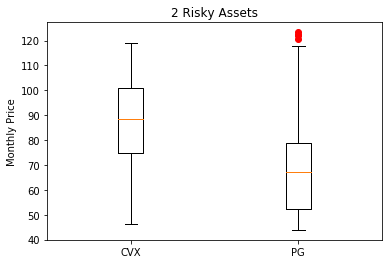

In [50]:
#Are there outliers in the data of the 2 assets due to news especially quaterly reports and dividend payout?
BoxPlot_Data = []
BoxPlot_Data.append(combined_df["CVX"])
# BoxPlot_Data.append(Tunde_finalMerged_df["XOM"])
BoxPlot_Data.append(combined_df["PG"])
# BoxPlot_Data.append(Tunde_finalMerged_df["CL"])
# BoxPlot_Data.append(Tunde_finalMerged_df["PEP"])
# BoxPlot_Data.append(Tunde_finalMerged_df["SP500"])
Risky_Assets =["CVX","PG"]
fig1, ax1=plt.subplots()
ax1.set_title("2 Risky Assets")
ax1.set_ylabel("Monthly Price")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2], Risky_Assets)
#plt.savefig("Images/Boxplots.pdf")
plt.show()